In [2]:
"""
works after:
 1. pipx runpip eth-ape install notebook matplotlib
 2. ape console
 3. In [1]: from notebook import notebookapp as app
    In [2]: app.launch_new_instance()

NOTE: for some reason `ape-notebook` plugin not displaying in cli when run `ape -h`, so needed to
      pipx runpip install notebook into my ape package env. Then run `ape-notebook` one line src from
      `ape console`.

TODO: figure out why ape-notebook plugin not working for me.
"""
import matplotlib.pyplot as plt
import pandas as pd
import typing as tp
from ape import accounts, chain, Contract, networks

In [3]:
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [4]:
# get account 0
dev = accounts.test_accounts[0]
dev

<TestAccount 0x1e59ce931B4CFea3fe4B875411e280e173cB7A9C>

In [5]:
# get the balance of account 0
dev.balance

0

In [6]:
current_block = chain.blocks[-1].number
current_block

15453443

In [7]:
dblocks = int(86400*90/12) # last 90 d
start_block = current_block - dblocks
start_block

14805443

In [8]:
curve_steth = Contract("0xDC24316b9AE028F1497c275EB9192a3Ea0f67022")
curve_steth

<Vyper_contract 0xDC24316b9AE028F1497c275EB9192a3Ea0f67022>

In [9]:
steth = Contract("0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84")
steth

<Lido 0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84>

In [10]:
steth.balanceOf(curve_steth)

575658210915253555589421

In [11]:
curve_steth.TokenExchange

TokenExchange(address indexed buyer, int128 sold_id, uint256 tokens_sold, int128 bought_id, uint256 tokens_bought)

In [12]:
type(curve_steth.TokenExchange)

ape.contracts.base.ContractEvent

In [13]:
%time query_swaps_recent = curve_steth.TokenExchange.query("*", start_block=current_block-3000) # last 10 hr
query_swaps_recent

INFO: Cache database has not been initialized
CPU times: user 196 ms, sys: 26.9 ms, total: 223 ms
Wall time: 1.88 s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x956af002608129dd6ac4e4fc26d22c29c07ff851399f...,15450485,0xf1aa3e96a97b0fcf81ddbdf53219e0d3495d2897263b...,106,60
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe39fd820B58f83205Db1D9225f2810597...,0x0f1557104fa013ee3d1d92ec92d3ab16dc10e46ab0f2...,15450719,0xb88126572d0338abcd7bb5f49a81a048b021030aa72d...,147,65
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe39fd820B58f83205Db1D9225f2810597...,0xfe398fa1ce4e56b6c063a9c743878b226bccdb09d76c...,15450734,0xf7b2a9abc9ce40d306be3031ac947b29631f86dcc3a7...,60,30
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x0fea6aa189b8ee306014c05003529e4f547287fd0377...,15450744,0x0015778b093cf178caab14255a74dd319ab3c2279337...,92,24
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x9f4F18AC9cc9dE7C1441AC39Ab2DbD717...,0x9d4bb587f534abf5e77cb95c76c1fb13ce6ab877ecf9...,15450927,0x206f05a6f95ed5051e0ce6a7902dfa2f91af95f49421...,498,232
5,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x9f4F18AC9cc9dE7C1441AC39Ab2DbD717...,0x7c99cd9810b1fb51ce0131154b69417d76b31c86e115...,15450946,0xfbf37b47706ad7d4d707567a4a15537d69e62ff51e32...,203,98
6,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x5604049369caddd71c0a039ba1a23efe234340b4354b...,15451001,0xdee58292ceffd44f10764d429486449a17d672d9fcb2...,89,84
7,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xC869D1e7132290280cA0b4f58Ba711a1b...,0x3d0b9cc596ec50b2e75b74ceae4a96d319368c034829...,15451066,0xc1299cad6834767c9d9a9aefdd1bfa41010871d4f630...,428,203
8,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x60b59e663b2cb6de26582e2e64b8cdabdb694293c1bc...,15451131,0xfc4dea708731daa341260cecd9b3f09ad5e8cf290b45...,64,123
9,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xafd8e2187e0e5dd8389e734f290ed7f0c2a7013566d2...,15451144,0x0ed4e61d1dbabba11656f87cc03dcd3fa6ea3f7a5c53...,516,96


In [14]:
# sweet, very cool :)
type(query_swaps_recent)

pandas.core.frame.DataFrame

In [15]:
# take a deeper dive into event arguments column. it's a pandas series
query_swaps_recent["event_arguments"][:10]

0    {'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...
1    {'buyer': '0xe39fd820B58f83205Db1D9225f2810597...
2    {'buyer': '0xe39fd820B58f83205Db1D9225f2810597...
3    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
4    {'buyer': '0x9f4F18AC9cc9dE7C1441AC39Ab2DbD717...
5    {'buyer': '0x9f4F18AC9cc9dE7C1441AC39Ab2DbD717...
6    {'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...
7    {'buyer': '0xC869D1e7132290280cA0b4f58Ba711a1b...
8    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
9    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
Name: event_arguments, dtype: object

In [16]:
type(query_swaps_recent["event_arguments"])

pandas.core.series.Series

In [17]:
query_swaps_recent["event_arguments"].iloc[-1]

{'buyer': '0xFEf3C7aa6956D03dbad8959c59155c4A465DCacd',
 'sold_id': 1,
 'tokens_sold': 38000000000000000000,
 'bought_id': 0,
 'tokens_bought': 36894174538661211189}

In [18]:
# ok great. let's look a bit further into the past to start_block from above. see how long it takes
%time query_swaps_original = curve_steth.TokenExchange.query("*", start_block=start_block)
query_swaps_original

CPU times: user 36.8 s, sys: 5.59 s, total: 42.4 s
Wall time: 3min 21s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0405e31AB5C379BCB710D34e500E009bb...,0x20d30f0bf8fb847a4559f1657d0dd889ea3ae834717d...,14805457,0xf960de9c1f42c8cde319f4d969399998d3e6a01e43eb...,124,49
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0405e31AB5C379BCB710D34e500E009bb...,0xb495f5108e88d7191228ca3afc5d3e7ace48b8018d19...,14805483,0xf6a8385fb1c4c3fe0e8375a04e4685aed4a52ba93257...,286,85
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xdeFDE7f1a6c87Fe9aB44D15D4348a7261...,0x0cfeefd81e3b4acf0d8aea84c307a114b2c826fe1eb4...,14805568,0x99bd1e6ac4be16b0fcdffb2030dca997cc5e90ed92a8...,668,310
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb0AaA288f2D7b56E74667B2224C9fd08C...,0xebffc1ae2319e0bd46720fb622cf6b1ca9ce9d96bb14...,14805584,0x484d3194cca15e7e8b5f652514315c6832dba7e52003...,128,48
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb054E7683f26273b4BA7454Df9a71C578...,0x7d5dd23c02e2912b81efd89e639030d7d62b5def3b5d...,14805677,0x37f0b368ab5429c67382a1d599418dce766b97719038...,155,113
...,...,...,...,...,...,...,...,...
19469,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x058e8157491c3e3f5e22aee4b6d2ea2f36c339c485f3...,15453224,0x965ebe6548cf34e23967df067984fa65d46901bc0d2d...,199,141
19470,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x3af20d3d2d0a504c737acd87dc5bb08b3dc8e850451b...,15453251,0xcc771be3ddaadfee1d19e52e9031992601b53ed38298...,235,113
19471,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x288931fA76d7B0482f0FD0BCA9a50Bf0D...,0x88b37e4687fac18dd7494213f627e7c67ba8a84a7686...,15453267,0x8c1227315df64ba095b4bb16bf1d3811b5a5a64d8734...,25,18
19472,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xfbd9536fbf0828c437411e50fc8b3b0bd02fd19d5629...,15453273,0x7e1dc601f2ca31ec40fbf90ca779cd85a79779798eaa...,316,271


In [19]:
query_swaps = query_swaps_original.copy()

In [20]:
# get coin indices:
#  - 0 = ETH (native)
#  - 1 = stETH
coin_indices = [curve_steth.coins(i) for i in range(2)]
coin_indices

['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',
 '0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84']

In [21]:
steth.address == coin_indices[-1]

True

In [22]:
# cache the fee to calculate associated price correctly (prior to fees applied)
curve_steth_fee = curve_steth.fee() / 1e10  # fee denom is 1e10
curve_steth_fee

0.0004

In [23]:
# if sold_id == 1, then selling stETH for ETH, which is price wanted
#  i.e. quote = <ETH>, base = <stETH>
last_swap = query_swaps["event_arguments"].iloc[-1]
print('last swap event:', last_swap)

last_price = last_swap['tokens_bought'] * (1+curve_steth_fee) / last_swap['tokens_sold']
if last_swap['sold_id'] == 0:
    last_price = 1 / last_price
print('price:', last_price)

last swap event: {'buyer': '0xFEf3C7aa6956D03dbad8959c59155c4A465DCacd', 'sold_id': 1, 'tokens_sold': 38000000000000000000, 'bought_id': 0, 'tokens_bought': 36894174538661211189}
price: 0.9712876896967544


In [24]:
# write a function that iterates over event_arguments to calculate marginal price from last token swap
def get_price(event_args: dict) -> float:
    price = event_args['tokens_bought'] * (1+curve_steth_fee) / event_args['tokens_sold']
    if event_args['sold_id'] == 0:
        price = 1 / price
    return price

In [25]:
# validate with logic in cell above for last price
get_price(query_swaps["event_arguments"].iloc[-1]) == last_price

True

In [26]:
# create new column with marginal price (stETH as base and ETH as quote, so should be at a discount)
query_swaps['price (STETH/ETH)'] = query_swaps['event_arguments'].apply(get_price)
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH)
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0405e31AB5C379BCB710D34e500E009bb...,0x20d30f0bf8fb847a4559f1657d0dd889ea3ae834717d...,14805457,0xf960de9c1f42c8cde319f4d969399998d3e6a01e43eb...,124,49,0.983167
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0405e31AB5C379BCB710D34e500E009bb...,0xb495f5108e88d7191228ca3afc5d3e7ace48b8018d19...,14805483,0xf6a8385fb1c4c3fe0e8375a04e4685aed4a52ba93257...,286,85,0.983170
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xdeFDE7f1a6c87Fe9aB44D15D4348a7261...,0x0cfeefd81e3b4acf0d8aea84c307a114b2c826fe1eb4...,14805568,0x99bd1e6ac4be16b0fcdffb2030dca997cc5e90ed92a8...,668,310,0.983171
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb0AaA288f2D7b56E74667B2224C9fd08C...,0xebffc1ae2319e0bd46720fb622cf6b1ca9ce9d96bb14...,14805584,0x484d3194cca15e7e8b5f652514315c6832dba7e52003...,128,48,0.983172
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb054E7683f26273b4BA7454Df9a71C578...,0x7d5dd23c02e2912b81efd89e639030d7d62b5def3b5d...,14805677,0x37f0b368ab5429c67382a1d599418dce766b97719038...,155,113,0.983171
...,...,...,...,...,...,...,...,...,...
19469,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x058e8157491c3e3f5e22aee4b6d2ea2f36c339c485f3...,15453224,0x965ebe6548cf34e23967df067984fa65d46901bc0d2d...,199,141,0.971321
19470,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x3af20d3d2d0a504c737acd87dc5bb08b3dc8e850451b...,15453251,0xcc771be3ddaadfee1d19e52e9031992601b53ed38298...,235,113,0.971295
19471,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x288931fA76d7B0482f0FD0BCA9a50Bf0D...,0x88b37e4687fac18dd7494213f627e7c67ba8a84a7686...,15453267,0x8c1227315df64ba095b4bb16bf1d3811b5a5a64d8734...,25,18,0.971295
19472,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xfbd9536fbf0828c437411e50fc8b3b0bd02fd19d5629...,15453273,0x7e1dc601f2ca31ec40fbf90ca779cd85a79779798eaa...,316,271,0.971294


<AxesSubplot:xlabel='block_number'>

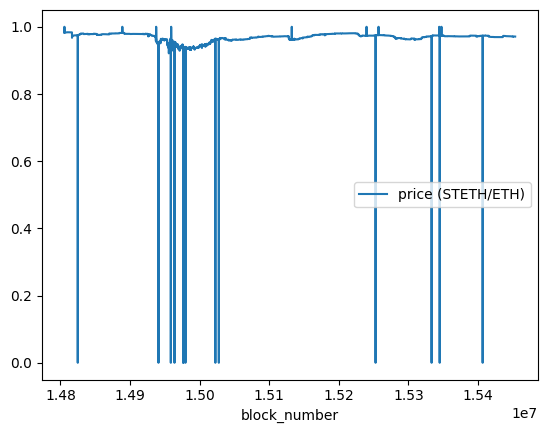

In [27]:
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

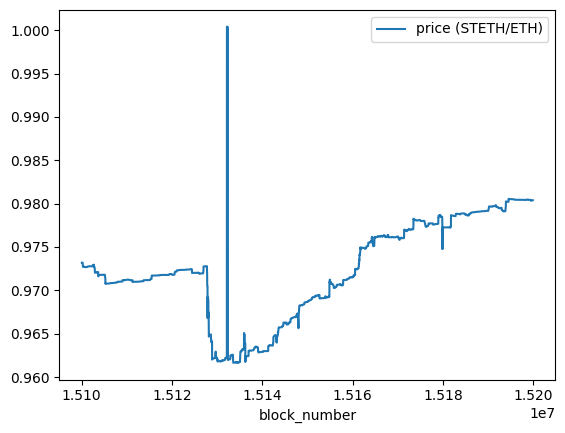

In [28]:
# well those are weird dips and spikes. look at smooth parts
query_swaps[(query_swaps['block_number'] > 15100000) & (query_swaps['block_number'] < 15200000)].plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

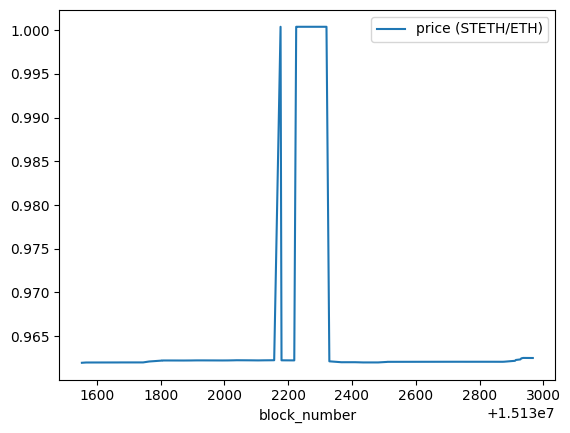

In [29]:
# weird spike for swaps back to 1.000 exchange rate. should look at this in event df
query_swaps[(query_swaps['block_number'] > 15131500) & (query_swaps['block_number'] < 15133000)].plot(x='block_number', y='price (STETH/ETH)')

In [30]:
# first, unfold event arguments into separate columns
def unfold_event_args(key: str, event_args: dict) -> tp.Any:
    return event_args[key]

for key in query_swaps.iloc[-1]['event_arguments'].keys():
    query_swaps[key] = query_swaps['event_arguments'].apply(lambda ev: unfold_event_args(key, ev))

In [31]:
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0405e31AB5C379BCB710D34e500E009bb...,0x20d30f0bf8fb847a4559f1657d0dd889ea3ae834717d...,14805457,0xf960de9c1f42c8cde319f4d969399998d3e6a01e43eb...,124,49,0.983167,0x0405e31AB5C379BCB710D34e500E009bbB79f584,1,10167522643986959,0,9992378799804834
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0405e31AB5C379BCB710D34e500E009bb...,0xb495f5108e88d7191228ca3afc5d3e7ace48b8018d19...,14805483,0xf6a8385fb1c4c3fe0e8375a04e4685aed4a52ba93257...,286,85,0.983170,0x0405e31AB5C379BCB710D34e500E009bbB79f584,0,26000000000000000000,1,26434509719357013730
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xdeFDE7f1a6c87Fe9aB44D15D4348a7261...,0x0cfeefd81e3b4acf0d8aea84c307a114b2c826fe1eb4...,14805568,0x99bd1e6ac4be16b0fcdffb2030dca997cc5e90ed92a8...,668,310,0.983171,0xdeFDE7f1a6c87Fe9aB44D15D4348a7261A3d124c,1,58933000000000000,0,57918055488983827
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb0AaA288f2D7b56E74667B2224C9fd08C...,0xebffc1ae2319e0bd46720fb622cf6b1ca9ce9d96bb14...,14805584,0x484d3194cca15e7e8b5f652514315c6832dba7e52003...,128,48,0.983172,0xb0AaA288f2D7b56E74667B2224C9fd08CF75FD5F,0,1250000000000000000,1,1270887318662477233
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb054E7683f26273b4BA7454Df9a71C578...,0x7d5dd23c02e2912b81efd89e639030d7d62b5def3b5d...,14805677,0x37f0b368ab5429c67382a1d599418dce766b97719038...,155,113,0.983171,0xb054E7683f26273b4BA7454Df9a71C578506aa01,1,100000000000000,0,98277822712870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19469,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x058e8157491c3e3f5e22aee4b6d2ea2f36c339c485f3...,15453224,0x965ebe6548cf34e23967df067984fa65d46901bc0d2d...,199,141,0.971321,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,1,169826067574159234869,0,164889652408983591802
19470,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x3af20d3d2d0a504c737acd87dc5bb08b3dc8e850451b...,15453251,0xcc771be3ddaadfee1d19e52e9031992601b53ed38298...,235,113,0.971295,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,0,3635848717978495173,1,3741801778040826748
19471,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x288931fA76d7B0482f0FD0BCA9a50Bf0D...,0x88b37e4687fac18dd7494213f627e7c67ba8a84a7686...,15453267,0x8c1227315df64ba095b4bb16bf1d3811b5a5a64d8734...,25,18,0.971295,0x288931fA76d7B0482f0FD0BCA9a50Bf0D22b9FEf,1,2500000000000000000,0,2427267369123763553
19472,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xfbd9536fbf0828c437411e50fc8b3b0bd02fd19d5629...,15453273,0x7e1dc601f2ca31ec40fbf90ca779cd85a79779798eaa...,316,271,0.971294,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,1,4271237846165710434,0,4146970008556619586


In [32]:
# now, check swaps where price spikes up to 1 between blocks 15132100 and 15132400
query_swaps[(query_swaps['block_number'] > 15132100) & (query_swaps['block_number'] < 15132400)]

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
11351,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0xbaafb0dd80a49933313f5fae987331002fddd66ce398...,15132106,0x3f0dafa8c0bc1f75da4b77185df4b5e72f82367ce714...,6,1,0.962210,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,9999999999999999,0,9618254969587698
11352,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x38ecea57eecc869cc4a62d96555f15ffe3136f32e06d...,15132124,0x97431fe5b1b89ff7dd6dd8c340ca44707052bbdf729f...,291,123,0.962220,0xfA9a30350048B2BF66865ee20363067c66f67e58,0,33697027127765331114,1,35006090866436268938
11353,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0031130c56162e00A7e9C01eE4147b11c...,0xed21e5dc1f4099e247b0e815eb3874a7ff1d837d3a8e...,15132156,0x369ef5481d51a5d35c3e5fa176283314cdd284d829eb...,73,46,0.962230,0x0031130c56162e00A7e9C01eE4147b11cbac8776,0,2461328000000000000,1,2556919375120216623
11354,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x7438e5f555766a7f549d93c98022e0c6484729fa8d9f...,15132176,0x7905d8a7692da709cb1f9deaed58d35b3e29fa956fae...,34,10,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11355,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x722c4b153c4e33f1f5cbd0819d4847851d588d08184a...,15132179,0x8ec15d94c325e9e9552dc7f2c48e20f982ff5e694b3f...,40,24,0.962221,0xfA9a30350048B2BF66865ee20363067c66f67e58,1,35006090866436268938,0,33670122355004768780
11356,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x93Fa84f3102d45fC8e0721143c05b2c15...,0x510b3876226e4bc81ae5afeedc3754dffcd5842bbe1d...,15132219,0x57d3a5987fce344172cc3549db379419aff5745c1ccc...,323,144,0.962212,0x93Fa84f3102d45fC8e0721143c05b2c156026025,0,1300000000000000000,1,1350513053366563254
11357,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x56804547a6d74ac0152564a250aff84cea33b85ed53f...,15132225,0xc766211f83c2421824f805fd98f43bca867a03c63947...,62,8,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11358,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x3356a73accd1729384e364750411036472c2b9ff5327...,15132229,0x368ab30333621f418f1f6634d737d72adb2f77421518...,58,12,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11359,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0xd6978029b6bb52e8b4ffae55ce8f5a2de8b652ef0a1f...,15132280,0xd3893a3097aadadfa9fea3fadad6f7bdd48c54c03f80...,6,1,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11360,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x93751a459ccb0838f4cfe07960e6afff4eeaf33facbe...,15132283,0x74c38343de39bd403e4c49b068e389068b21be043ef0...,6,1,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1


In [33]:
# ahh, ok :) .. someones selling 1 wei into the pool (see e.g. block 15132225)
# which is causing rounding issues for price calc

<AxesSubplot:xlabel='block_number'>

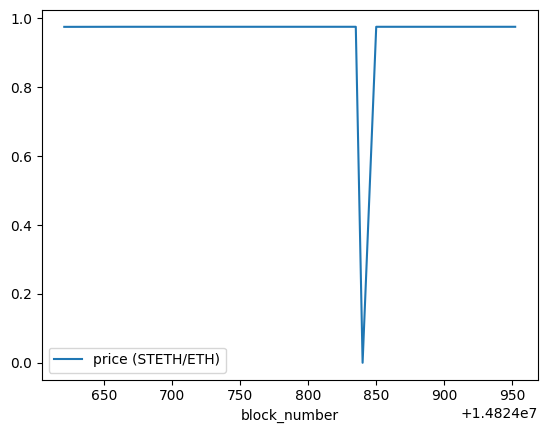

In [34]:
# are the dusting rounding issues also causing those spikes down to zero?
# look at first spike down to 0
query_swaps[(query_swaps['block_number'] > 14824600) & (query_swaps['block_number'] < 14825000)].plot(x='block_number', y='price (STETH/ETH)')

In [35]:
# looks like it (see swap at block 14824840); similar rounding issues except rounded down to zero here
query_swaps[(query_swaps['block_number'] > 14824600) & (query_swaps['block_number'] < 14825000)]

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
428,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x08CC4a936A24A278097FeB566Fccf71FF...,0xbefdc34be9f6d50dcf7d9692c834f2fcb750a7880a30...,14824621,0x10cf6cb3feb597dcaefdfa6fab3730491fea055a51b4...,236,204,0.975627,0x08CC4a936A24A278097FeB566Fccf71FFe84A833,0,2000000000000000000000,1,2049143953945768280377
429,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0xe7a98e6b9dbdab7e4e169efbb8ba055a9f0a28da8587...,14824663,0xc07d6c8038fd4165fd07386037f0a63b56701b00e1d7...,66,60,0.975835,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,0,9669640333791112375,1,9905129894611176792
430,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x27239549DD40E1D60F5B80B0C41969237...,0xebbe2cac6a8cea633f4ce13aecc6b3d402f0a53de0df...,14824714,0x090d8bfa4b34ab2e8670c488fdde86fa8c5caef4cbd4...,115,81,0.975836,0x27239549DD40E1D60F5B80B0C4196923745B1FD2,1,4393970000000000000,0,4286080251138498473
431,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x6a1a41032f086a90520761d6444937ff73b3aea580c2...,14824787,0x2749b488383fe28bb2abeab7d111d8472e406c445803...,150,92,0.975836,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,1000730293446869257,0,976157742840268152
432,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0xf97ecc3423d91b6f51e0f384518237b4c5439490f21f...,14824795,0x9038606c713de55bd5e65ed931117811e79820115ee7...,139,77,0.975836,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,0,476594175496263493,1,488200580530122222
433,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0xd3c3131024e6f4fb640f27a7a07513c44a4247ea663c...,14824820,0x0c7676c94dcc0bd3a33e55f1ae8bce51c723e1251f5d...,43,49,0.975835,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,10000000000000000000,0,9754443750619738380
434,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xEda584Ac4234113e977Bd172e6393F579...,0x953204aa910f21a8012789670728e410039a8f9840b6...,14824835,0xfdf144489b7e75244e22839ce1c8a398f7745a57a1c0...,397,246,0.975829,0xEda584Ac4234113e977Bd172e6393F579282b816,1,47870179539630044007,0,46694419191845003347
435,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xEda584Ac4234113e977Bd172e6393F579...,0xb2c64c3e9722df4fbcd79662cd6746e069ae08f55242...,14824840,0xfc556897c82ced07979693ce76cd27b4565e78cb0959...,462,195,0.000000,0xEda584Ac4234113e977Bd172e6393F579282b816,1,1,0,0
436,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x27239549DD40E1D60F5B80B0C41969237...,0xc5de9e64196dff8dd176eece734d88b68e9f4e41cd1d...,14824850,0x1bc4068a1b8284a00ea135dc590d18744bf548a1c795...,84,43,0.975824,0x27239549DD40E1D60F5B80B0C4196923745B1FD2,0,1000000000000000000,1,1024364849804104284
437,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x11CE580B7D64Fb08F73161AA95835202a...,0xe0c2a35ae160788e8d1d73a5bf465279363581af043f...,14824871,0x0f6bf5cc06980ac2ef46f0a73831494c426c0c9b3336...,394,188,0.975824,0x11CE580B7D64Fb08F73161AA95835202ae1C9417,1,381485996253488127,0,372114382696495947


In [36]:
# apply min size to swaps we care about to ignore the dustings
min_bought = 0.0001 * 1e18  # trade size must be > 0.0001 ETH 
query_swaps = query_swaps[query_swaps['tokens_bought'] > min_bought]

<AxesSubplot:xlabel='block_number'>

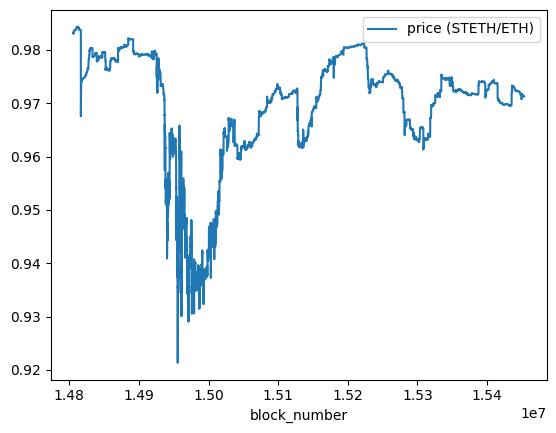

In [37]:
# nice! way better
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

In [38]:
# should smooth the price data out so not so jittery by averaging over 1h for hourly candles.
# keep the volumes numbers as well, so make some slight changes to the (tokens_bought, tokens_sold)
# columns to instead track (volume_coin0, volume_coin1) at each swap

In [39]:
# write a function that returns volume on coin indices for a swap (normalized by 1e18 for decimals)
def get_volume(coin_index: int, x: pd.Series) -> (float, float):
    volume = x['tokens_sold'] if x['sold_id'] == coin_index else x['tokens_bought']
    volume = volume / 1e18
    return volume

In [40]:
%%capture
for coin_index in range(2):
    key = f'volume_coin{coin_index}'
    query_swaps[key] = query_swaps.apply(lambda x: get_volume(coin_index, x), axis=1)

In [41]:
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought,volume_coin0,volume_coin1
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0405e31AB5C379BCB710D34e500E009bb...,0x20d30f0bf8fb847a4559f1657d0dd889ea3ae834717d...,14805457,0xf960de9c1f42c8cde319f4d969399998d3e6a01e43eb...,124,49,0.983167,0x0405e31AB5C379BCB710D34e500E009bbB79f584,1,10167522643986959,0,9992378799804834,0.009992,0.010168
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0405e31AB5C379BCB710D34e500E009bb...,0xb495f5108e88d7191228ca3afc5d3e7ace48b8018d19...,14805483,0xf6a8385fb1c4c3fe0e8375a04e4685aed4a52ba93257...,286,85,0.983170,0x0405e31AB5C379BCB710D34e500E009bbB79f584,0,26000000000000000000,1,26434509719357013730,26.000000,26.434510
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xdeFDE7f1a6c87Fe9aB44D15D4348a7261...,0x0cfeefd81e3b4acf0d8aea84c307a114b2c826fe1eb4...,14805568,0x99bd1e6ac4be16b0fcdffb2030dca997cc5e90ed92a8...,668,310,0.983171,0xdeFDE7f1a6c87Fe9aB44D15D4348a7261A3d124c,1,58933000000000000,0,57918055488983827,0.057918,0.058933
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb0AaA288f2D7b56E74667B2224C9fd08C...,0xebffc1ae2319e0bd46720fb622cf6b1ca9ce9d96bb14...,14805584,0x484d3194cca15e7e8b5f652514315c6832dba7e52003...,128,48,0.983172,0xb0AaA288f2D7b56E74667B2224C9fd08CF75FD5F,0,1250000000000000000,1,1270887318662477233,1.250000,1.270887
5,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb054E7683f26273b4BA7454Df9a71C578...,0xafb0099a314db2e83400b537657ee04337520bdeeca6...,14805681,0xdb8a0a77934b6464e1034597d5c4c5aa3fb0c42d079d...,375,330,0.983166,0xb054E7683f26273b4BA7454Df9a71C578506aa01,1,77961806193896438421,0,76618727602637632134,76.618728,77.961806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19469,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x058e8157491c3e3f5e22aee4b6d2ea2f36c339c485f3...,15453224,0x965ebe6548cf34e23967df067984fa65d46901bc0d2d...,199,141,0.971321,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,1,169826067574159234869,0,164889652408983591802,164.889652,169.826068
19470,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x3af20d3d2d0a504c737acd87dc5bb08b3dc8e850451b...,15453251,0xcc771be3ddaadfee1d19e52e9031992601b53ed38298...,235,113,0.971295,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,0,3635848717978495173,1,3741801778040826748,3.635849,3.741802
19471,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x288931fA76d7B0482f0FD0BCA9a50Bf0D...,0x88b37e4687fac18dd7494213f627e7c67ba8a84a7686...,15453267,0x8c1227315df64ba095b4bb16bf1d3811b5a5a64d8734...,25,18,0.971295,0x288931fA76d7B0482f0FD0BCA9a50Bf0D22b9FEf,1,2500000000000000000,0,2427267369123763553,2.427267,2.500000
19472,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xfbd9536fbf0828c437411e50fc8b3b0bd02fd19d5629...,15453273,0x7e1dc601f2ca31ec40fbf90ca779cd85a79779798eaa...,316,271,0.971294,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,1,4271237846165710434,0,4146970008556619586,4.146970,4.271238


In [42]:
# prep for smoothing by setting index to block number (choose last swap in block to represent price at block)
query_swaps_filtered = query_swaps.filter(['block_number', 'price (STETH/ETH)', 'volume_coin0', 'volume_coin1']).drop_duplicates('block_number', keep='last')
query_swaps_filtered = query_swaps_filtered.set_index('block_number')

In [43]:
# reindex by block number (1 block steps) and ffill price values 
new_index = range(query_swaps_filtered.index.min(), query_swaps_filtered.index.max()+1)
query_swaps_filtered = query_swaps_filtered.reindex(new_index).ffill()

In [44]:
# separate data into windows of 260 blocks (~ 1h)
# remove first (last_block - first_block) % window rows so even candle windows
window = 260
first_index = (query_swaps_filtered.index[-1] - query_swaps_filtered.index[0]) % window
query_swaps_filtered = query_swaps_filtered[first_index:]

In [47]:
# smooth data using mean over 260 blocks for ~ 1h candles
s = (query_swaps_filtered.index.to_series() / window).astype(int)
query_swaps_candled = query_swaps_filtered.groupby(s).agg({'price (STETH/ETH)': 'mean', 'volume_coin0': 'sum', 'volume_coin1': 'sum'}).set_index(s.index[::window])
query_swaps_candled

,price (STETH/ETH),volume_coin0,volume_coin1
block_number,,,
14805660,0.983168,1033.148770,1051.237779
14805920,0.983139,17257.404737,17558.708657
14806180,0.983021,465.503446,473.733190
14806440,0.983528,13372.529511,13594.004819
14806700,0.983531,577.045459,586.743927
...,...,...,...
15452280,0.971433,7123.503594,7335.881852
15452540,0.971358,2614.723467,2690.797257
15452800,0.971362,327.123487,336.706041


<AxesSubplot:xlabel='block_number'>

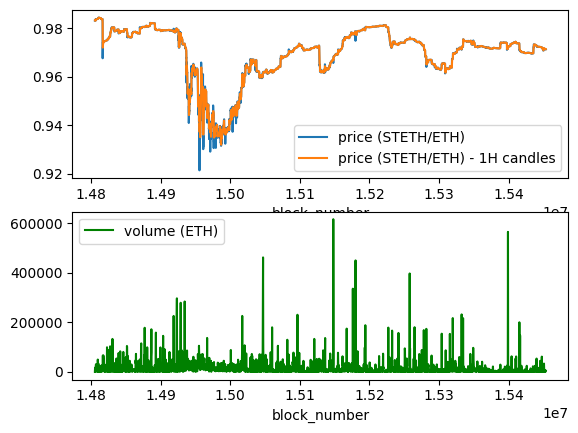

In [48]:
# make some fancy plots w subplots ...
fig, ax = plt.subplots(2, 1)
query_swaps.plot(x='block_number', y='price (STETH/ETH)', ax=ax[0])
query_swaps_candled.plot(y='price (STETH/ETH)', ax=ax[0], label='price (STETH/ETH) - 1H candles')
query_swaps_candled.plot(y='volume_coin0', color='g', ax=ax[1], label='volume (ETH)')

In [ ]:
# TODO: also, instead of just mean, should do ohlc since that'd be dope to plot :o